# Training models

# Linear Regression

## Normal equation

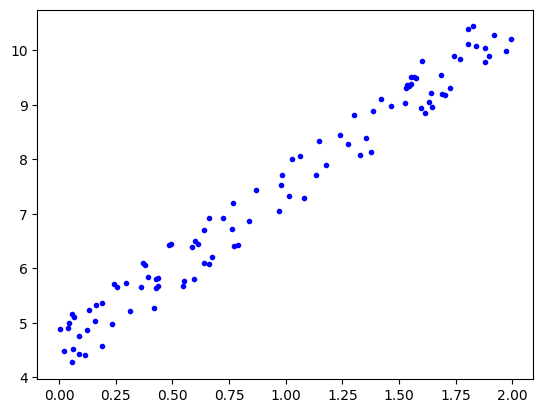

In [78]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X, y, "b.")

In [79]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).T.dot(X_b.T).dot(y)
theta_best

array([[4.57871231],
       [2.93232179]])

In [80]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)

y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 4.57871231]
 [10.44335589]]


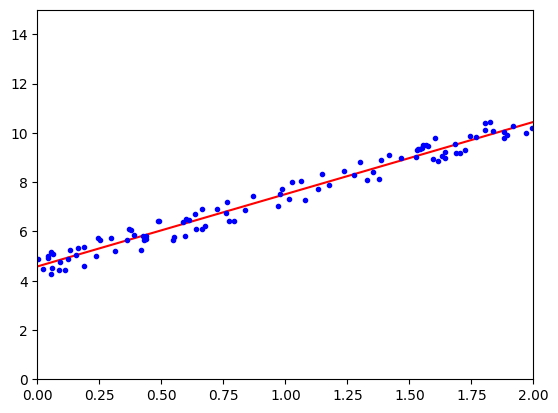

In [81]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0., 2., 0., 15.])
plt.show()

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.57871231]), array([[2.93232179]]))

In [83]:
lin_reg.predict(X_new)

array([[ 4.57871231],
       [10.44335589]])

## Batch gradient descent

In [84]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)

for it in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.57871231],
       [2.93232179]])

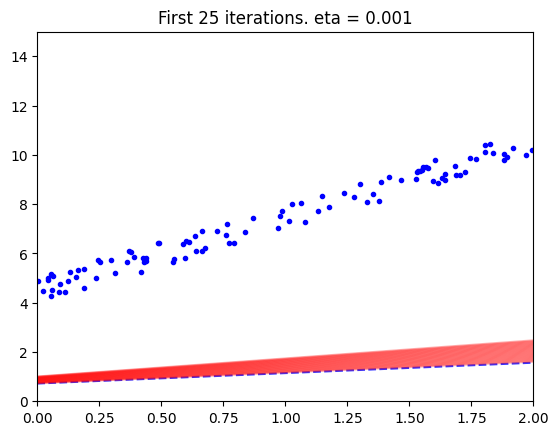

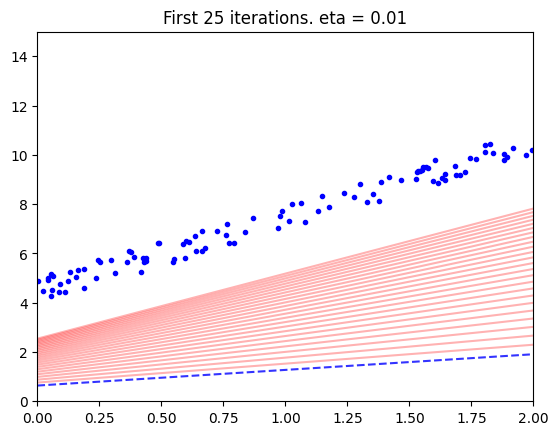

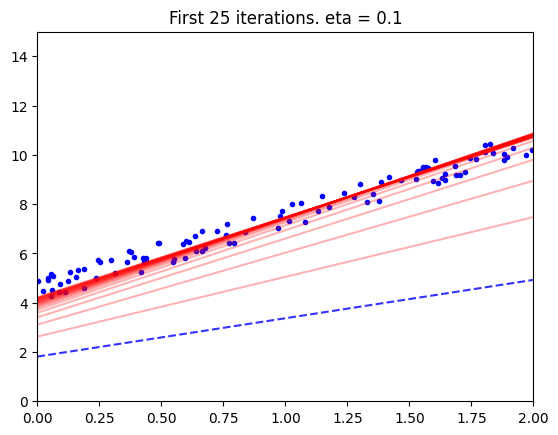

In [85]:
# Plot the resulting line with different learning rates. Starting line is red dashed. Try with 1e-2, 1e-1, 0.5, 1.0. One plot per learning rate. Plot only 10 first iterations.
from matplotlib import pyplot as plt

etas = [1e-3, 1e-2, 1e-1]
for eta in etas:
    theta = np.random.rand(2,1)
    plt.plot(X, y, "b.")
    for it in range(25):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        if it == 0:
            plt.plot(X_new, y_predict, "b--", alpha=.8)
        else:
            plt.plot(X_new, y_predict, "r-", alpha=.3)
        plt.title("First 25 iterations. eta = " + str(eta))
    plt.axis([0., 2., 0., 15.])
    plt.show()

## Stochastic gradient descent

In [86]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

theta

array([[4.57248748],
       [2.91884427]])

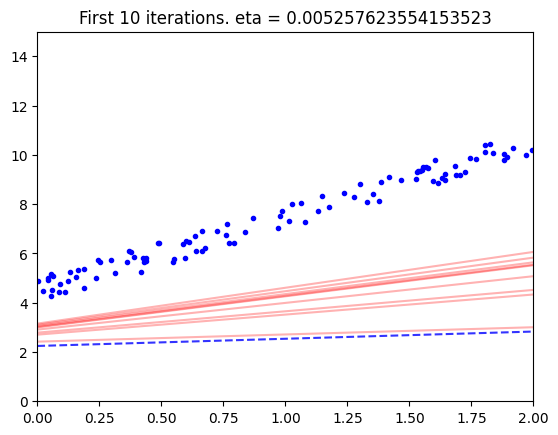

In [87]:
# Plot the first 10 iterations of the stochastic gradient descent with learning rate 0.1. Plot only 10 first iterations.

n_epochs = 50
theta = np.random.randn(2,1)
plt.plot(X, y, "b.")
for it in range(10):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(it * m + 1)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    if it == 0:
        plt.plot(X_new, y_predict, "b--", alpha=.8)
    else:
        plt.plot(X_new, y_predict, "r-", alpha=.3)
    plt.title("First 10 iterations. eta = " + str(eta))

plt.axis([0., 2., 0., 15.])
plt.show()

In [88]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.59653743]), array([2.96595339]))

## Polynomial regression

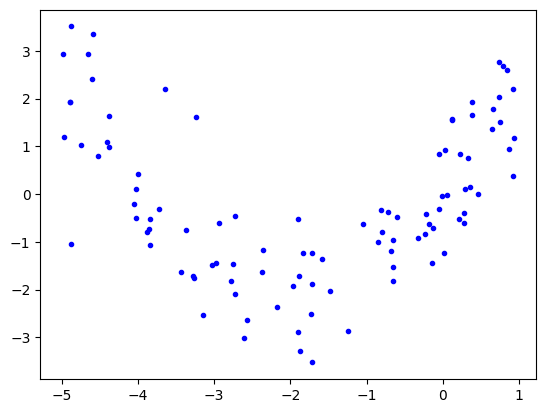

In [89]:
m = 100
X = 6 * np.random.rand(m, 1) - 5
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(
    degree = 2,
    include_bias=False
)

X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-3.37216251, 11.37148001])

In [91]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.06820428]), array([[1.86735842, 0.47524993]]))

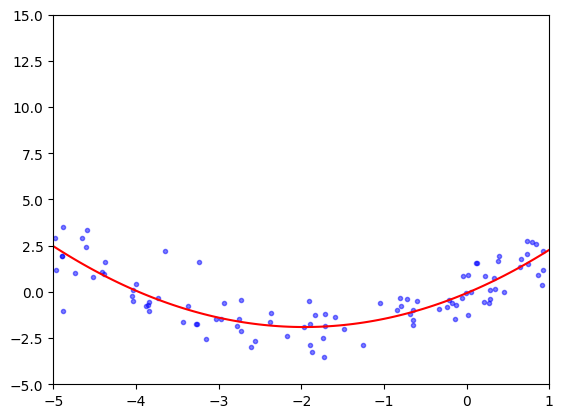

In [92]:
# Plot same as above but with polynomial regression. Move graph to show the curve.
plt.plot(X, y, "b.", alpha=.5)
X_new = np.linspace(-5, 1, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-")
plt.axis([-5, 1, -5, 15])
plt.show()


In [93]:
# Plot learning curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    

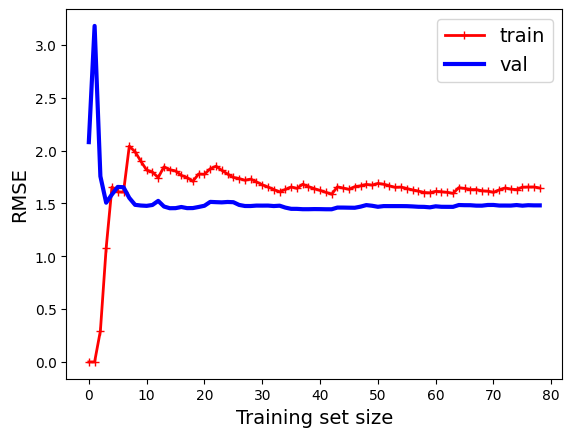

In [94]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

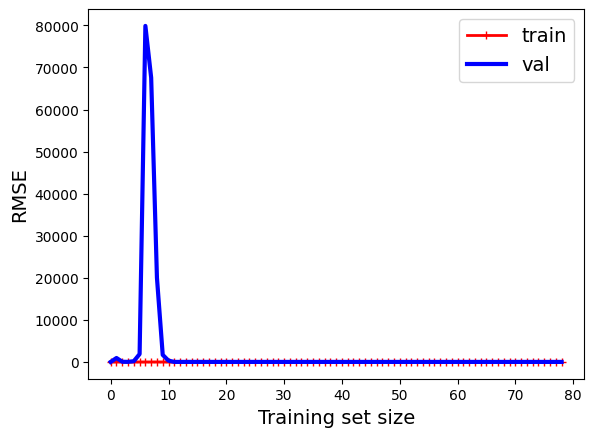

In [95]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

## Regularized models

### Ridge regression

In [96]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[-0.14276787]])

In [97]:
# SGDRegressor with Ridge regularization

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([-0.09289796])

### Lasso regression

In [98]:
# Lasso regression subgradient vector

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([-0.17980433])

### Elastic Net

In [99]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([-0.17980433])

### Early stopping

# Logistic regression

In [100]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [109]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int32)

In [110]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

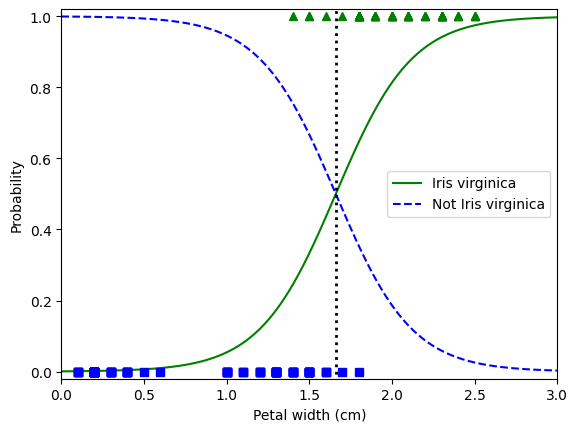

In [125]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.axis([0, 3, -0.02, 1.02])
plt.legend()

In [126]:
# Now with two features, petal width and length

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.int32)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

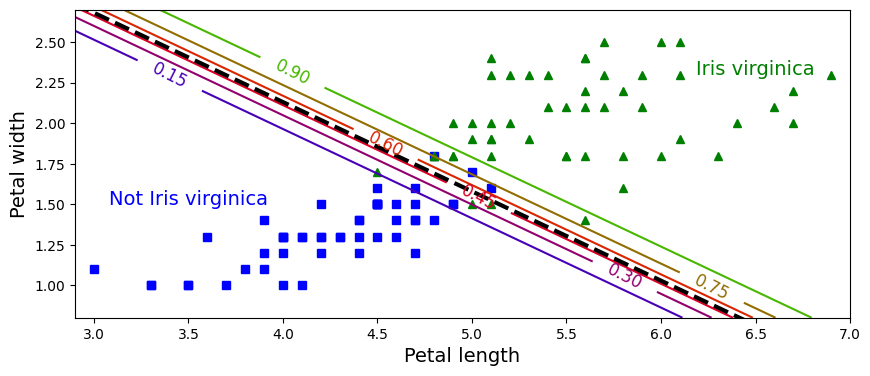

In [127]:
# Plot the decision boundary

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)

contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Softmax regression

In [130]:
# gridsearch softmax regression
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

X = iris["data"][:, (2, 3)]
y = iris["target"]

# Grid search for hyperparameters
param_grid = [
    {"penalty": ["l2"], "C": [0.5, 1, 2, 5, 10, 20, 50, 100]}
]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
grid_search = GridSearchCV(softmax_reg, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 2, 5, 10, 20, 50, 100],
                          'penalty': ['l2']}],
             verbose=3)

In [131]:
best_model = grid_search.best_estimator_
best_model.predict([[5, 2]])

array([2])

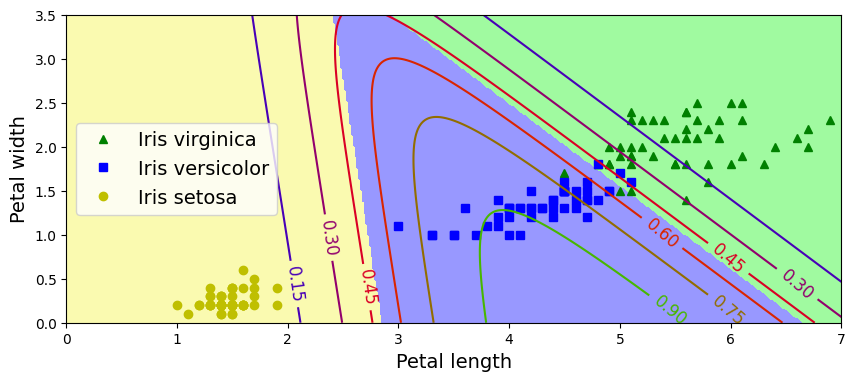

In [138]:
# Plot softmax regression decision boundaries

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = best_model.predict_proba(X_new)
y_predict = best_model.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()